In [149]:
# import necessary libraries, with two extra hash function and one default hash function
from bitarray import bitarray
import mmh3
import jhashcode

In [150]:
# reading username_30.txt file
# create set S by appending context to the list

open_file_30 = open("listed_username_30.txt", "r")

S = []
for x in open_file_30:
    S.append(x)
open_file_30.close()

In [139]:
S[:5]

['!Alain\n',
 '#file_links["C:urlsactivity0711.txt",1,N]\n',
 '#file_links["C:urlsactivity1311.txt",1,N]\n',
 '#file_links["C:workmacrosincacar_url.txt",1,N]\n',
 '#file_links["C:\\\\urls\\\\activity0311.txt",1,N]\n']

In [151]:
# reading file from user_365.txt
# do the same thing like last code block

open_file_365 = open("listed_username_365.txt", "r")

stream = []
for x in open_file_365:
    stream.append(x)
open_file_365.close()

In [141]:
stream[:5]

['!!!!AAAiiizz\n',
 '!!!Aomnzbzxd\n',
 '!!!Azamant\n',
 '!!!gxgvegfibhcs\n',
 '!!AbcaBlida\n']

In [116]:
# define number of hash function
# initialize the bitarray, initally all 0s

hash_memory_size = len(S)
B = bitarray(hash_memory_size)

In [117]:
# set bitarray to be all 0s
B.setall(0)

In [39]:
B[:5]

bitarray('00000')

In [61]:
# model with only using one hash function
# set bit to 1, like B[h(s)] = 1
hash_table = {}
for i in S:
    hash_value = mmh3.hash(i) % hash_memory_size
    B[hash_value] = 1
    hash_table[i] = i

In [78]:
# model with two hash function
hash_table2 = {}
for i in S:
    hash_value = mmh3.hash(i) % hash_memory_size
    hash_value2 = jhashcode.hashcode(i) % hash_memory_size
    B[hash_value] = 1
    B[hash_value2] = 1
    hash_table2[i] = i

In [125]:
# model with three hash function
hash_table3 = {}
for i in S:
    hash_value = mmh3.hash(i) % hash_memory_size
    hash_value2 = jhashcode.hashcode(i) % hash_memory_size
    hash_value3 = hash(i) % hash_memory_size
    B[hash_value] = 1
    B[hash_value2] = 1
    B[hash_value3] = 1
    hash_table3[i] = i

In [119]:
B[:5]

bitarray('11111')

In [152]:
def get_FPR_one_hash():
    # initialize false postive and true negative to 0
    FP = 0
    TN = 0
    for i in stream:
        stream_value = mmh3.hash(i) % hash_memory_size
        if B[stream_value] == 1:
            if i not in hash_table:
                FP += 1
        else:
            TN += 1
    return float(FP)/(TN+FP)*100

In [83]:
get_FPR_one_hash()

86.38578708259958

In [153]:
def get_FPR_two_hash():
    # initialize false postive and true negative to 0
    FP = 0
    TN = 0
    for i in stream:
        stream_value = mmh3.hash(i) % hash_memory_size
        stream_value2 = jhashcode.hashcode(i) % hash_memory_size
        if B[stream_value] == 1 and B[stream_value2] == 1:
            if i not in hash_table:
                FP += 1
        else:
            TN += 1
    return float(FP)/(TN+FP)*100

In [85]:
get_FPR_two_hash()

74.59041059505039

In [154]:
def get_FPR_three_hash():
    # initialize false postive and true negative to 0
    FP = 0
    TN = 0
    for i in stream:
        stream_value = mmh3.hash(i) % hash_memory_size
        stream_value2 = jhashcode.hashcode(i) % hash_memory_size
        stream_value3 = hash(i) % hash_memory_size
        if B[stream_value] == 1 and B[stream_value2] == 1 and B[stream_value3] == 1:
            if i not in hash_table:
                FP += 1
        else:
            TN += 1
    return float(FP)/(TN+FP)*100

In [127]:
get_FPR_three_hash()

94.57304593880455

In [155]:
# collect different n performance with one hash function
history_one_hash = []

for x in (2**p for p in range(1, 4)):
    hash_memory_size = len(S) * x
    B = bitarray(hash_memory_size)
    B.setall(0)

    hash_table = {}
    for i in S:
        hash_value = mmh3.hash(i) % hash_memory_size
        B[hash_value] = 1
        hash_table[i] = i  
    history_one_hash.append(get_FPR_one_hash())

In [158]:
# collect different n performance with two hash function
history_two_hash = []

for x in (2**p for p in range(1, 4)):
    hash_memory_size = len(S) * x
    B = bitarray(hash_memory_size)
    B.setall(0)

    hash_table2 = {}
    for i in S:
        hash_value = mmh3.hash(i) % hash_memory_size
        hash_value2 = jhashcode.hashcode(i) % hash_memory_size
        B[hash_value] = 1
        B[hash_value2] = 1
        hash_table2[i] = i
    history_two_hash.append(get_FPR_two_hash())

In [161]:
# collect different n performance with three hash function
history_three_hash = []

for x in (2**p for p in range(1, 4)):
    hash_memory_size = len(S) * x
    B = bitarray(hash_memory_size)
    B.setall(0)

    hash_table3 = {}
    for i in S:
        hash_value = mmh3.hash(i) % hash_memory_size
        hash_value2 = jhashcode.hashcode(i) % hash_memory_size
        hash_value3 = hash(i) % hash_memory_size
        B[hash_value] = 1
        B[hash_value2] = 1
        B[hash_value3] = 1
        hash_table3[i] = i
        
    history_three_hash.append(get_FPR_three_hash())

In [163]:
history_three_hash

[46.8469817074887, 14.70563248444576, 3.0568806362844034]

In [162]:
import matplotlib.pyplot as plt

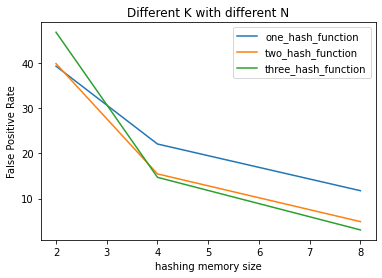

In [165]:
fig, ax = plt.subplots()

x = [2,4,8]
ax.plot(x, history_one_hash, label='one_hash_function') 
ax.plot(x, history_two_hash, label='two_hash_function') 
ax.plot(x, history_three_hash, label='three_hash_function') 

ax.set_xlabel('hashing memory size')
ax.set_ylabel('False Positive Rate') 
ax.set_title('Different K with different N') 

ax.legend() 

plt.show()


In [175]:
# all the result is found out from the plot
print("The optimal number of hash function(k): ", 3)
print("My hashing memory size(n) is: ", 8)
print("Percentage of false postives: "+str(history_three_hash[2])+'%')

The optimal number of hash function(k):  3
My hashing memory size(n) is:  8
Percentage of false postives: 3.0568806362844034%
